In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\sponer bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_sponer.csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-11.5,-12.3,-11.8,-12.3,-11.8,-12.0,-12.0,-11.4,-9.5,-11.5,...,-11.4,-9.5,-13.1,-11.8,-12.0,-11.2,-11.5,-9.5,-11.4,1
1,-11.5,-11.4,-9.5,-12.3,-12.0,-12.0,-10.6,-11.4,-12.3,-12.0,...,-11.5,-11.4,-12.0,-11.8,-12.3,-11.8,-12.3,-12.0,-10.6,1
2,-11.2,-10.6,-12.0,-12.3,-11.8,-12.3,-11.4,-12.0,-12.0,-11.5,...,-13.1,-9.5,-11.4,-10.6,-12.3,-11.8,-12.0,-12.0,-12.3,1
3,-11.5,-13.2,-13.1,-9.5,-11.4,-12.0,-10.6,-12.0,-12.0,-11.2,...,-11.4,-12.3,-10.6,-12.3,-9.5,-11.4,-11.5,-13.2,-9.5,1
4,-11.2,-12.0,-10.6,-12.0,-11.4,-11.5,-12.0,-11.2,-11.8,-12.3,...,-13.1,-11.4,-12.0,-11.5,-11.4,-12.0,-12.0,-12.0,-12.0,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-11.5,-11.8,-11.2,-10.6,-11.4,-12.3,-10.6,-12.0,-12.0,-11.2,...,-11.5,-13.2,-9.5,-13.1,-9.5,-9.5,-11.4,-12.0,-11.5,-11.8
1,-9.5,-11.4,-11.5,-11.4,-12.0,-11.5,-9.5,-11.4,-12.0,-11.8,...,-12.3,-13.2,-9.5,-13.1,-13.2,-12.3,-10.6,-11.2,-11.8,-13.1
2,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,-11.8,-12.3,-12.0,-11.8,...,-12.0,-12.0,-11.8,-12.3,-11.5,-13.2,-11.5,-12.0,-12.3,-11.4
3,-11.8,-12.3,-11.4,-12.0,-10.6,-12.0,-12.0,-12.3,-11.8,-12.0,...,-13.1,-13.2,-11.5,-12.3,-13.2,-11.5,-12.0,-12.0,-11.2,-12.0
4,-12.0,-12.0,-11.5,-11.4,-11.8,-13.1,-13.2,-11.5,-11.4,-11.5,...,-11.5,-11.4,-11.5,-12.3,-11.4,-10.6,-12.3,-11.4,-10.6,-11.2


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-11.5,-11.8,-11.2,-10.6,-11.4,-12.3,-10.6,-12.0,-12.0,-11.2,...,-11.5,-13.2,-9.5,-13.1,-9.5,-9.5,-11.4,-12.0,-11.5,-11.8
1,-9.5,-11.4,-11.5,-11.4,-12.0,-11.5,-9.5,-11.4,-12.0,-11.8,...,-12.3,-13.2,-9.5,-13.1,-13.2,-12.3,-10.6,-11.2,-11.8,-13.1
2,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,-11.8,-12.3,-12.0,-11.8,...,-12.0,-12.0,-11.8,-12.3,-11.5,-13.2,-11.5,-12.0,-12.3,-11.4
3,-11.8,-12.3,-11.4,-12.0,-10.6,-12.0,-12.0,-12.3,-11.8,-12.0,...,-13.1,-13.2,-11.5,-12.3,-13.2,-11.5,-12.0,-12.0,-11.2,-12.0
4,-12.0,-12.0,-11.5,-11.4,-11.8,-13.1,-13.2,-11.5,-11.4,-11.5,...,-11.5,-11.4,-11.5,-12.3,-11.4,-10.6,-12.3,-11.4,-10.6,-11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-10.6,-12.0,-12.3,-13.2,-11.5,-12.3,-9.5,-11.8,-12.0,-12.3,...,-11.5,-11.4,-11.5,-11.8,-12.0,-12.3,-13.2,-9.5,-9.5,-12.3
14665,-11.4,-12.0,-11.5,-11.8,-11.4,-12.3,-11.8,-9.5,-12.3,-11.5,...,-10.6,-12.0,-11.2,-11.8,-11.5,-11.4,-9.5,-11.5,-11.2,-11.8
14666,-12.0,-12.0,-12.0,-12.0,-12.3,-9.5,-13.2,-13.1,-11.8,-11.2,...,-12.0,-11.2,-11.5,-11.4,-11.8,-12.3,-11.5,-11.8,-12.0,-12.3
14667,-13.1,-11.4,-12.0,-10.6,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,...,-11.2,-10.6,-12.0,-12.0,-12.0,-12.0,-11.2,-11.8,-12.3,-11.8


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-11.5,-11.8,-11.2,-10.6,-11.4,-12.3,-10.6,-12.0,-12.0,-11.2,...,-13.2,-9.5,-13.1,-9.5,-9.5,-11.4,-12.0,-11.5,-11.8,0
1,-9.5,-11.4,-11.5,-11.4,-12.0,-11.5,-9.5,-11.4,-12.0,-11.8,...,-13.2,-9.5,-13.1,-13.2,-12.3,-10.6,-11.2,-11.8,-13.1,0
2,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,-11.8,-12.3,-12.0,-11.8,...,-12.0,-11.8,-12.3,-11.5,-13.2,-11.5,-12.0,-12.3,-11.4,0
3,-11.8,-12.3,-11.4,-12.0,-10.6,-12.0,-12.0,-12.3,-11.8,-12.0,...,-13.2,-11.5,-12.3,-13.2,-11.5,-12.0,-12.0,-11.2,-12.0,0
4,-12.0,-12.0,-11.5,-11.4,-11.8,-13.1,-13.2,-11.5,-11.4,-11.5,...,-11.4,-11.5,-12.3,-11.4,-10.6,-12.3,-11.4,-10.6,-11.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-10.6,-12.0,-12.3,-13.2,-11.5,-12.3,-9.5,-11.8,-12.0,-12.3,...,-11.4,-11.5,-11.8,-12.0,-12.3,-13.2,-9.5,-9.5,-12.3,0
14665,-11.4,-12.0,-11.5,-11.8,-11.4,-12.3,-11.8,-9.5,-12.3,-11.5,...,-12.0,-11.2,-11.8,-11.5,-11.4,-9.5,-11.5,-11.2,-11.8,0
14666,-12.0,-12.0,-12.0,-12.0,-12.3,-9.5,-13.2,-13.1,-11.8,-11.2,...,-11.2,-11.5,-11.4,-11.8,-12.3,-11.5,-11.8,-12.0,-12.3,0
14667,-13.1,-11.4,-12.0,-10.6,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,...,-10.6,-12.0,-12.0,-12.0,-12.0,-11.2,-11.8,-12.3,-11.8,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-11.575595
1,-79,-11.580183
2,-78,-11.595528
3,-77,-11.576174
4,-76,-11.584212
...,...,...
94,14,-11.557407
95,15,-11.563835
96,16,-11.568669
97,17,-11.542055


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-11.593490,150
1,-79,-11.604745,151
2,-78,-11.596176,152
3,-77,-11.602072,153
4,-76,-11.608037,154
...,...,...,...
94,14,-11.606265,244
95,15,-11.606619,245
96,16,-11.612973,246
97,17,-11.613573,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


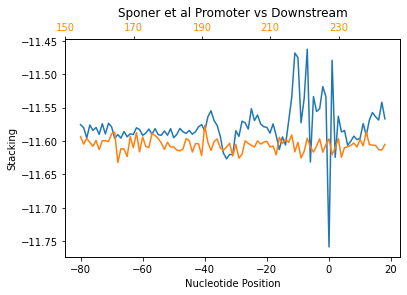

In [20]:
import matplotlib.ticker as ticker

# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'], color='darkorange')

# set the gap between the tick labels
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Sponer et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-11.5,-12.3,-11.8,-12.3,-11.8,-12.0,-12.0,-11.4,-9.5,-11.5,...,-11.4,-9.5,-13.1,-11.8,-12.0,-11.2,-11.5,-9.5,-11.4,1
1,-11.5,-11.4,-9.5,-12.3,-12.0,-12.0,-10.6,-11.4,-12.3,-12.0,...,-11.5,-11.4,-12.0,-11.8,-12.3,-11.8,-12.3,-12.0,-10.6,1
2,-11.2,-10.6,-12.0,-12.3,-11.8,-12.3,-11.4,-12.0,-12.0,-11.5,...,-13.1,-9.5,-11.4,-10.6,-12.3,-11.8,-12.0,-12.0,-12.3,1
3,-11.5,-13.2,-13.1,-9.5,-11.4,-12.0,-10.6,-12.0,-12.0,-11.2,...,-11.4,-12.3,-10.6,-12.3,-9.5,-11.4,-11.5,-13.2,-9.5,1
4,-11.2,-12.0,-10.6,-12.0,-11.4,-11.5,-12.0,-11.2,-11.8,-12.3,...,-13.1,-11.4,-12.0,-11.5,-11.4,-12.0,-12.0,-12.0,-12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-10.6,-12.0,-12.3,-13.2,-11.5,-12.3,-9.5,-11.8,-12.0,-12.3,...,-11.4,-11.5,-11.8,-12.0,-12.3,-13.2,-9.5,-9.5,-12.3,0
29334,-11.4,-12.0,-11.5,-11.8,-11.4,-12.3,-11.8,-9.5,-12.3,-11.5,...,-12.0,-11.2,-11.8,-11.5,-11.4,-9.5,-11.5,-11.2,-11.8,0
29335,-12.0,-12.0,-12.0,-12.0,-12.3,-9.5,-13.2,-13.1,-11.8,-11.2,...,-11.2,-11.5,-11.4,-11.8,-12.3,-11.5,-11.8,-12.0,-12.3,0
29336,-13.1,-11.4,-12.0,-10.6,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,...,-10.6,-12.0,-12.0,-12.0,-12.0,-11.2,-11.8,-12.3,-11.8,0


# Prediction using machine learning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef, confusion_matrix

In [26]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [27]:
feature_list=list(X_train.columns)

In [28]:
#'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300

In [29]:
X.shape

(29338, 99)

## Model Training

In [30]:
kfold = KFold(n_splits=10, shuffle=True)
clf = RandomForestClassifier(max_depth=20,
                             max_features=None,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             n_estimators=300,
                             n_jobs=-1,
                             random_state=101)

fold_no = 1
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=109)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)

    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))

    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)

    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)

    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))

    fold_no += 1

Fold 1: Accuracy: 0.8275391956373551, Precision: 0.8672230652503794, Recall: 0.7754409769335142, F1 Score: 0.8187679083094556, MCC: 0.6589783293592893, Specificity: 0.8801369863013698
Fold 2: Accuracy: 0.8500340831629175, Precision: 0.9016522423288749, Recall: 0.784394250513347, F1 Score: 0.8389458272327964, MCC: 0.7058559021874248, Specificity: 0.9151391717583164
Fold 3: Accuracy: 0.843558282208589, Precision: 0.891520244461421, Recall: 0.7863881401617251, F1 Score: 0.8356605800214822, MCC: 0.6924387000376405, Specificity: 0.9020689655172414
Fold 4: Accuracy: 0.8404907975460123, Precision: 0.8870716510903427, Recall: 0.7790697674418605, F1 Score: 0.8295702840495266, MCC: 0.685918145507751, Specificity: 0.9014945652173914
Fold 5: Accuracy: 0.8415132924335378, Precision: 0.8894736842105263, Recall: 0.7881412391738841, F1 Score: 0.8357470858353939, MCC: 0.6883834644283814, Specificity: 0.8974180041870202
Fold 6: Accuracy: 0.8360599863667348, Precision: 0.8699690402476781, Recall: 0.78218

In [31]:
accuracy_list

[0.8275391956373551,
 0.8500340831629175,
 0.843558282208589,
 0.8404907975460123,
 0.8415132924335378,
 0.8360599863667348,
 0.8350374914792092,
 0.8408316291751875,
 0.8407773610637572,
 0.8465734742584384]

In [32]:
precision_list

[0.8672230652503794,
 0.9016522423288749,
 0.891520244461421,
 0.8870716510903427,
 0.8894736842105263,
 0.8699690402476781,
 0.8582202111613876,
 0.8912875867386276,
 0.889751552795031,
 0.8881226053639847]

In [33]:
recall_list

[0.7754409769335142,
 0.784394250513347,
 0.7863881401617251,
 0.7790697674418605,
 0.7881412391738841,
 0.7821851078636047,
 0.793584379358438,
 0.7800269905533064,
 0.77906186267845,
 0.7922077922077922]

In [34]:
specificity_list

[0.8801369863013698,
 0.9151391717583164,
 0.9020689655172414,
 0.9014945652173914,
 0.8974180041870202,
 0.8877755511022044,
 0.8746666666666667,
 0.9028925619834711,
 0.9028727770177839,
 0.9006802721088435]

In [35]:
f1_score_list 

[0.8187679083094556,
 0.8389458272327964,
 0.8356605800214822,
 0.8295702840495266,
 0.8357470858353939,
 0.8237449615243679,
 0.8246376811594203,
 0.8319539402662829,
 0.8307357738310982,
 0.8374277456647399]

In [36]:
mcc_list

[0.6589783293592893,
 0.7058559021874248,
 0.6924387000376405,
 0.685918145507751,
 0.6883834644283814,
 0.6746379258259128,
 0.6711893676502539,
 0.6875157146545636,
 0.6870397924188828,
 0.6971262794472901]

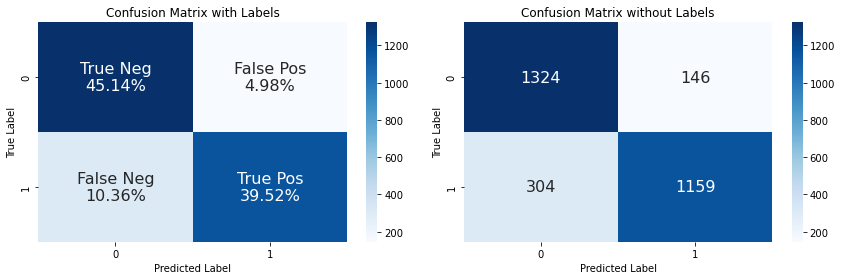

In [37]:
from sklearn.metrics import confusion_matrix
train_cm= confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [38]:
print(mean(accuracy_list))

0.8402415593331739


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


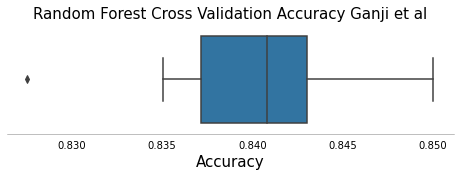

In [39]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('Random Forest Cross Validation Accuracy Ganji et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


## Feature Importance

In [40]:
clf.feature_importances_

array([0.00445695, 0.00442471, 0.00404503, 0.00446455, 0.00397649,
       0.00405614, 0.00427283, 0.00391936, 0.00445587, 0.00424061,
       0.0042558 , 0.00437247, 0.00440133, 0.00395906, 0.00430739,
       0.00444232, 0.00432545, 0.00428766, 0.00404576, 0.00403425,
       0.00428916, 0.00394182, 0.00430274, 0.00388113, 0.00388609,
       0.00416766, 0.00382521, 0.0039108 , 0.00440012, 0.00409694,
       0.00440091, 0.00417765, 0.00396031, 0.00412725, 0.00412335,
       0.00383486, 0.00389971, 0.00425966, 0.00402546, 0.00420593,
       0.00403616, 0.00421979, 0.00465206, 0.00400638, 0.00408963,
       0.00507929, 0.00483508, 0.00431454, 0.00408212, 0.00405238,
       0.0046824 , 0.00445027, 0.00424853, 0.00416543, 0.00403385,
       0.00440807, 0.0047334 , 0.00464787, 0.00503941, 0.00440226,
       0.00449756, 0.00441785, 0.00462576, 0.00459917, 0.00429731,
       0.00490977, 0.00525039, 0.01162038, 0.08987243, 0.26636597,
       0.03274072, 0.01342285, 0.02532026, 0.06759245, 0.02092

In [41]:
clf.feature_importances_.shape

(99,)

In [42]:
X_train.columns

Index([-80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67,
       -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53,
       -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11,
       -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18],
      dtype='object')

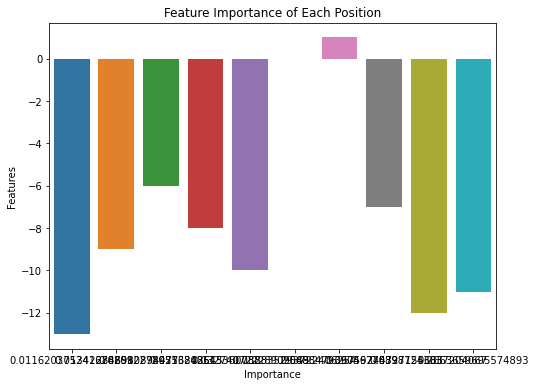

In [43]:
imp_df= pd.DataFrame({
    "Features": X_train.columns,
    "Importance": clf.feature_importances_
})

fi= imp_df.sort_values(by="Importance",ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x="Importance", y="Features")
plt.title('Feature Importance of Each Position')
plt.show()

In [44]:
feature_importance= pd.DataFrame(clf.feature_importances_)
feature_importance.reset_index(drop=False, inplace=True)
feature_importance['indice']= new_columns
feature_importance

,index,0,indice
0,0,0.004457,-80
1,1,0.004425,-79
2,2,0.004045,-78
3,3,0.004465,-77
4,4,0.003976,-76
...,...,...,...
94,94,0.004544,14
95,95,0.004271,15
96,96,0.004200,16
97,97,0.004027,17


[Text(0.5, 0, 'features'),
 Text(0, 0.5, 'importance'),
 Text(0.5, 1.0, 'feature importance')]

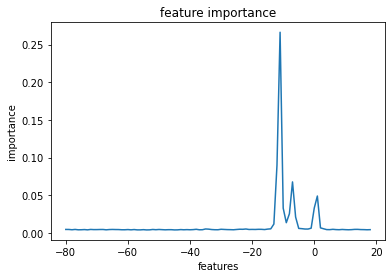

In [45]:
plot= sns.lineplot(x='indice', y=0, data=feature_importance)
plot.set(xlabel ="features", ylabel = "importance", title ='feature importance')

In [46]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.8465734742584384
Precision: 0.8881226053639847
Recall: 0.7922077922077922
f1_score: 0.8374277456647399


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


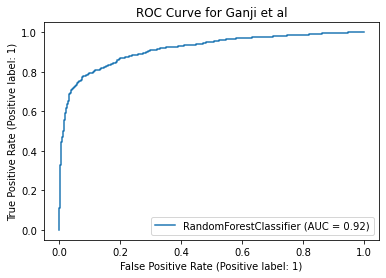

In [47]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Ganji et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


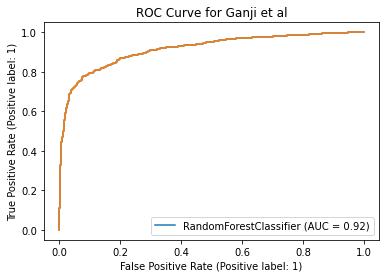

In [48]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc_df.to_csv('d:/ROC Curve data/downstream_sponer_rf_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [45]:
!pip install shap

In [46]:
import shap


In [47]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [48]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[7467, 4944, 6324, 5886, 7753, 552, 8078, 1887, 1284, 4861, 9460, 4529, 9613, 1964, 1417, 2272, 3341, 789, 6402, 5827, 1728, 5602, 5371, 6226, 7055, 6561, 2745, 2141, 2256, 8619, 3697, 8118, 5111, 9516, 528, 143, 9861, 4256, 2706, 7145]


In [49]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [50]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-10.6,-11.4,-9.5,-12.3,-11.8,-12.3,-11.5,-13.2,-11.5,-11.4,...,-13.2,-13.1,-13.2,-9.5,-13.1,-9.5,-11.4,-11.8,-13.1,-13.2
6345,-11.8,-12.3,-11.8,-12.3,-9.5,-13.2,-13.1,-11.4,-10.6,-11.4,...,-12.3,-12.0,-11.5,-11.4,-11.5,-11.8,-12.3,-9.5,-11.4,-11.5
8807,-12.3,-9.5,-13.2,-13.1,-13.2,-11.5,-12.3,-9.5,-11.4,-11.5,...,-12.0,-12.3,-9.5,-13.2,-13.1,-11.4,-10.6,-12.0,-12.0,-11.4
5017,-11.8,-12.3,-10.6,-12.3,-11.8,-12.0,-12.0,-12.3,-11.8,-11.2,...,-11.8,-9.5,-13.1,-11.4,-11.8,-9.5,-13.1,-11.8,-12.0,-11.4
2395,-12.3,-11.5,-11.4,-11.5,-11.8,-11.4,-12.3,-11.5,-9.5,-9.5,...,-10.6,-12.0,-11.2,-10.6,-12.0,-11.4,-11.5,-12.0,-12.0,-12.0
4771,-11.5,-11.8,-12.3,-11.4,-11.8,-11.5,-12.0,-12.3,-9.5,-13.2,...,-11.4,-9.5,-9.5,-12.3,-11.8,-13.1,-11.4,-10.6,-12.3,-13.2
6378,-11.4,-11.5,-9.5,-13.2,-12.3,-11.8,-12.3,-12.0,-10.6,-11.2,...,-9.5,-13.2,-12.3,-12.0,-11.8,-11.5,-11.2,-12.0,-10.6,-12.3
6038,-11.5,-11.2,-10.6,-11.4,-11.5,-11.2,-11.8,-11.5,-11.2,-10.6,...,-11.2,-10.6,-12.0,-11.4,-11.5,-11.4,-13.1,-11.4,-10.6,-11.2
2073,-13.1,-11.8,-11.2,-11.5,-13.2,-12.3,-11.5,-13.2,-12.3,-11.8,...,-10.6,-11.4,-12.3,-12.0,-10.6,-12.0,-12.0,-11.2,-10.6,-11.4
8765,-12.3,-12.0,-10.6,-11.2,-11.8,-9.5,-12.3,-10.6,-11.4,-9.5,...,-10.6,-12.3,-13.2,-9.5,-11.5,-12.0,-11.4,-11.5,-11.2,-10.6


In [51]:
explainer = shap.KernelExplainer(clf.predict, X_PCA_promoters)
shap_values = explainer.shap_values(X_PCA_promoters)

  0%|          | 0/40 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [52]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

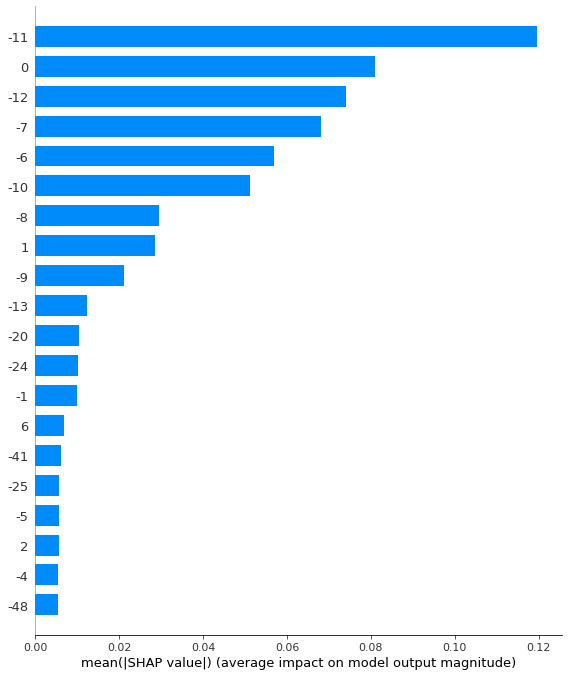

In [53]:
shap.summary_plot(shap_values,X_PCA_promoters, plot_type="bar", feature_names = X_PCA_promoters.columns)

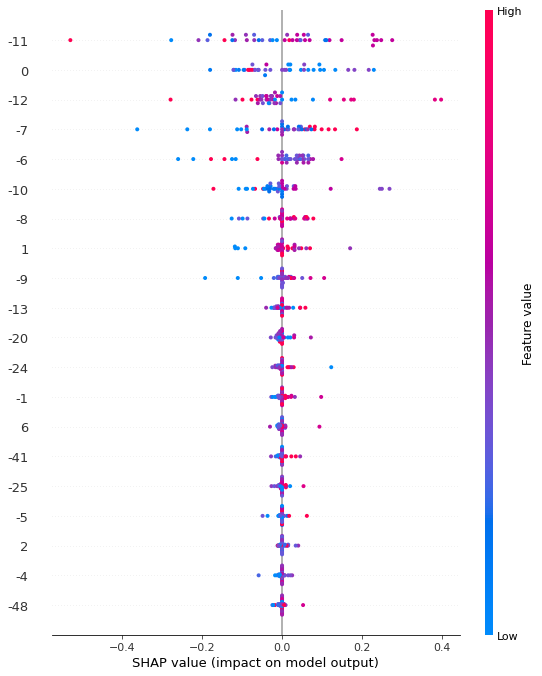

In [54]:
shap.summary_plot(shap_values, X_PCA_promoters, feature_names = X_PCA_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

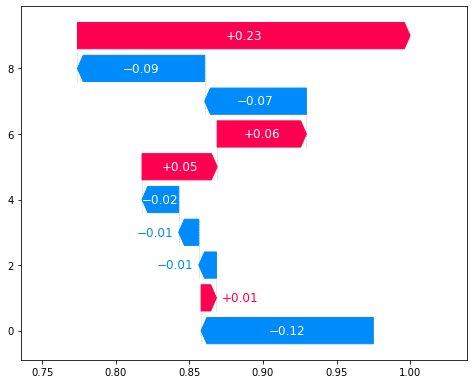

In [55]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [49]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\sponer\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\sponer\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\sponer\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\sponer\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [50]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



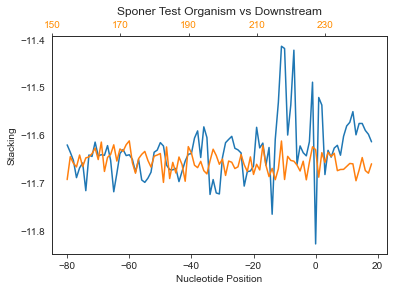

In [51]:
import matplotlib.ticker as ticker

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=test_line)
plot = sns.lineplot(x='index', y=0, data=downstream_test_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'], color='darkorange')

# set the gap between the tick labels
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Sponer Test Organism vs Downstream')

# show the plot
plt.show()


## Test Labels

In [52]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [53]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [54]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8915584415584416


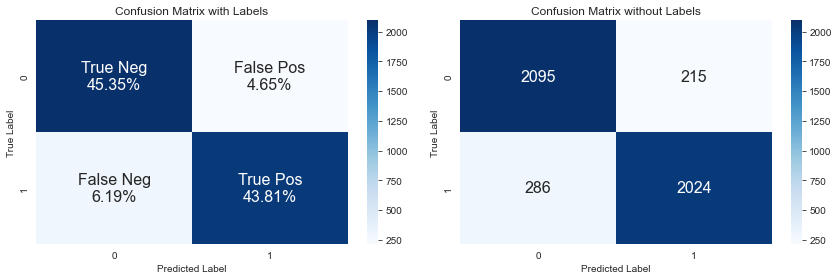

In [55]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [56]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [57]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.8787878787878788, Precision: 0.8820960698689956, Recall: 0.8744588744588745, F1 Score: 0.8782608695652173, MCC: 0.7576041535335462, Specificity: 0.8831168831168831
Fold 2/10
 Accuracy: 0.8679653679653679, Precision: 0.8571428571428571, Recall: 0.8831168831168831, F1 Score: 0.8699360341151385, MCC: 0.7362688617174394, Specificity: 0.8528138528138528
Fold 3/10
 Accuracy: 0.8809523809523809, Precision: 0.9074074074074074, Recall: 0.8484848484848485, F1 Score: 0.8769574944071588, MCC: 0.7635161692331852, Specificity: 0.9134199134199135
Fold 4/10
 Accuracy: 0.8852813852813853, Precision: 0.908256880733945, Recall: 0.8571428571428571, F1 Score: 0.8819599109131403, MCC: 0.7717859040735167, Specificity: 0.9134199134199135
Fold 5/10
 Accuracy: 0.9264069264069265, Precision: 0.9457013574660633, Recall: 0.9047619047619048, F1 Score: 0.9247787610619468, MCC: 0.8536140761750028, Specificity: 0.948051948051948
Fold 6/10
 Accuracy: 0.9112554112554112, Precision: 0.9241071428571

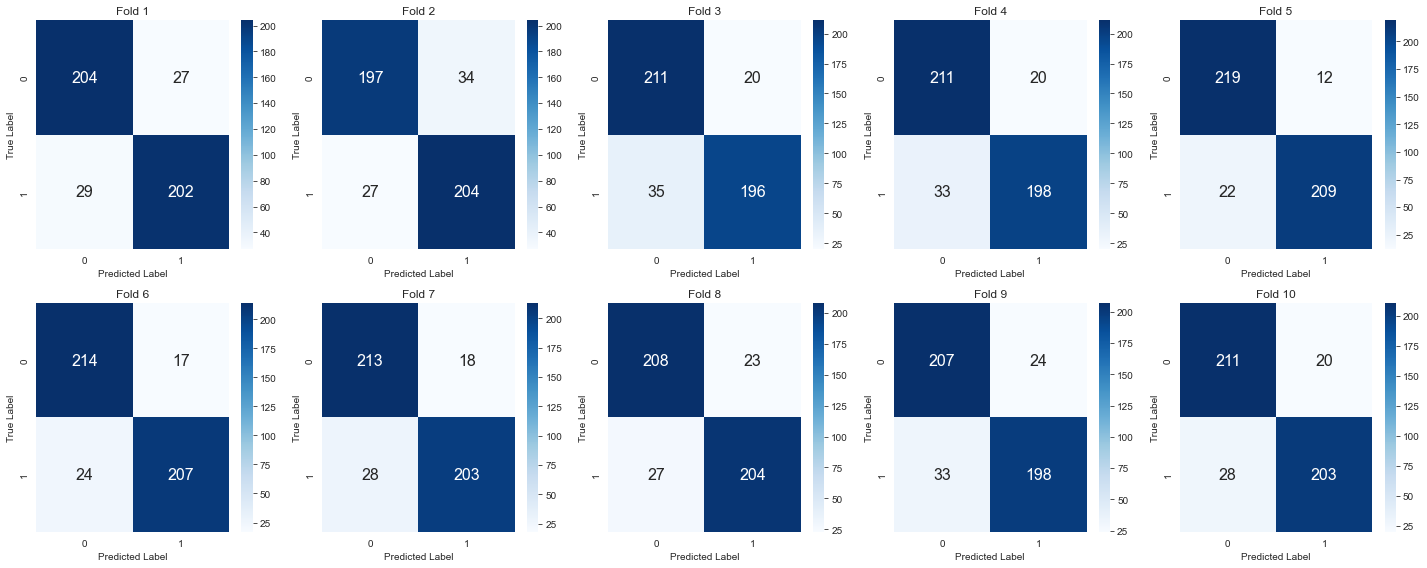

In [58]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [59]:
test_accuracy

[0.8787878787878788,
 0.8679653679653679,
 0.8809523809523809,
 0.8852813852813853,
 0.9264069264069265,
 0.9112554112554112,
 0.9004329004329005,
 0.8917748917748918,
 0.8766233766233766,
 0.8961038961038961]

In [60]:
test_precision

[0.8820960698689956,
 0.8571428571428571,
 0.9074074074074074,
 0.908256880733945,
 0.9457013574660633,
 0.9241071428571429,
 0.918552036199095,
 0.8986784140969163,
 0.8918918918918919,
 0.9103139013452914]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [61]:
test_recall

[0.8744588744588745,
 0.8831168831168831,
 0.8484848484848485,
 0.8571428571428571,
 0.9047619047619048,
 0.8961038961038961,
 0.8787878787878788,
 0.8831168831168831,
 0.8571428571428571,
 0.8787878787878788]

In [62]:
test_specificity

[0.8831168831168831,
 0.8528138528138528,
 0.9134199134199135,
 0.9134199134199135,
 0.948051948051948,
 0.9264069264069265,
 0.922077922077922,
 0.9004329004329005,
 0.8961038961038961,
 0.9134199134199135]

In [63]:
test_f1_score

[0.8782608695652173,
 0.8699360341151385,
 0.8769574944071588,
 0.8819599109131403,
 0.9247787610619468,
 0.9098901098901099,
 0.8982300884955752,
 0.8908296943231441,
 0.8741721854304636,
 0.8942731277533039]

In [64]:
test_mcc

[0.7576041535335462,
 0.7362688617174394,
 0.7635161692331852,
 0.7717859040735167,
 0.8536140761750028,
 0.8228887278018441,
 0.8016172796567286,
 0.783667281502953,
 0.7538191051195526,
 0.7926832982125802]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [65]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense sponer promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-11.2,-11.5,-9.5,-11.4,-10.6,-12.0,-11.4,-11.5,-12.0,-12.0,...,-9.5,-12.3,-12.0,-12.0,-12.0,-11.5,-11.4,-12.0,-11.5,1
1,-11.4,-12.0,-11.5,-13.2,-13.1,-11.4,-10.6,-11.2,-12.0,-11.5,...,-12.0,-11.5,-13.2,-12.3,-10.6,-11.4,-9.5,-12.3,-12.0,1
2,-12.0,-11.4,-12.3,-10.6,-12.3,-11.4,-10.6,-11.2,-10.6,-11.2,...,-11.5,-13.2,-11.5,-11.4,-13.1,-11.8,-11.2,-12.0,-12.0,1
3,-11.4,-11.5,-11.2,-11.5,-11.4,-12.0,-11.5,-13.2,-11.5,-12.3,...,-12.3,-9.5,-11.4,-11.5,-11.4,-12.0,-12.0,-10.6,-12.3,1
4,-11.5,-9.5,-11.8,-11.2,-12.0,-12.0,-10.6,-11.2,-11.8,-9.5,...,-12.3,-11.5,-9.5,-13.2,-9.5,-9.5,-11.5,-11.4,-11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-13.1,-11.8,-12.0,-12.0,-11.4,-9.5,-9.5,-9.5,-11.5,-12.0,...,-12.0,-11.4,-12.3,-10.6,-11.4,-13.1,-11.8,-11.4,-9.5,0
12164,-12.0,-11.4,-11.5,-12.0,-11.4,-13.1,-9.5,-11.8,-12.3,-13.2,...,-11.8,-9.5,-13.1,-9.5,-11.4,-11.5,-13.2,-13.1,-11.4,0
12165,-11.5,-12.3,-11.4,-10.6,-12.3,-9.5,-9.5,-9.5,-11.4,-11.5,...,-11.8,-11.5,-11.2,-12.0,-11.8,-12.3,-11.5,-13.2,-9.5,0
12166,-12.0,-11.5,-11.4,-10.6,-12.0,-12.3,-13.2,-13.1,-9.5,-9.5,...,-9.5,-9.5,-11.4,-11.8,-11.5,-12.0,-12.0,-11.2,-11.5,0


In [66]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [67]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.8027937551355793, Precision: 0.8312387791741472, Recall: 0.7602627257799671, F1 Score: 0.7941680960548885, MCC: 0.6078381345334491, Specificity: 0.9134199134199135
Fold 2/10
 Accuracy: 0.8052588331963846, Precision: 0.8152542372881356, Recall: 0.7898193760262726, F1 Score: 0.8023352793994997, MCC: 0.6108252183325373, Specificity: 0.8453947368421053
Fold 3/10
 Accuracy: 0.8069022185702547, Precision: 0.8235294117647058, Recall: 0.7816091954022989, F1 Score: 0.8020219039595619, MCC: 0.6146183811631383, Specificity: 0.8207236842105263
Fold 4/10
 Accuracy: 0.8241577649958916, Precision: 0.8353140916808149, Recall: 0.8078817733990148, F1 Score: 0.8213689482470785, MCC: 0.6486752439670757, Specificity: 0.8322368421052632
Fold 5/10
 Accuracy: 0.819227608874281, Precision: 0.8333333333333334, Recall: 0.7976973684210527, F1 Score: 0.8151260504201681, MCC: 0.6390259174601816, Specificity: 0.8404605263157895
Fold 6/10
 Accuracy: 0.8060805258833197, Precision: 0.798076923076

In [68]:
antisense_accuracy

[0.8027937551355793,
 0.8052588331963846,
 0.8069022185702547,
 0.8241577649958916,
 0.819227608874281,
 0.8060805258833197,
 0.8159408381265407,
 0.8184059161873459,
 0.8116776315789473,
 0.8092105263157895]

In [69]:
antisense_precision

[0.8312387791741472,
 0.8152542372881356,
 0.8235294117647058,
 0.8353140916808149,
 0.8333333333333334,
 0.7980769230769231,
 0.8310344827586207,
 0.8241206030150754,
 0.8228279386712095,
 0.8263888888888888]

In [70]:
antisense_recall

[0.7602627257799671,
 0.7898193760262726,
 0.7816091954022989,
 0.8078817733990148,
 0.7976973684210527,
 0.819078947368421,
 0.7927631578947368,
 0.8092105263157895,
 0.7944078947368421,
 0.7828947368421053]

In [71]:
antisense_specificity

[0.9134199134199135,
 0.8453947368421053,
 0.8207236842105263,
 0.8322368421052632,
 0.8404605263157895,
 0.8407224958949097,
 0.7931034482758621,
 0.8390804597701149,
 0.8275862068965517,
 0.8289473684210527]

In [72]:
antisense_f1_score

[0.7941680960548885,
 0.8023352793994997,
 0.8020219039595619,
 0.8213689482470785,
 0.8151260504201681,
 0.8084415584415584,
 0.8114478114478114,
 0.8165975103734441,
 0.80836820083682,
 0.8040540540540541]

In [73]:
antisense_mcc

[0.6078381345334491,
 0.6108252183325373,
 0.6146183811631383,
 0.6486752439670757,
 0.6390259174601816,
 0.6123808919354968,
 0.6325375702272921,
 0.6369102708953327,
 0.6237274198694029,
 0.6192793751163076]

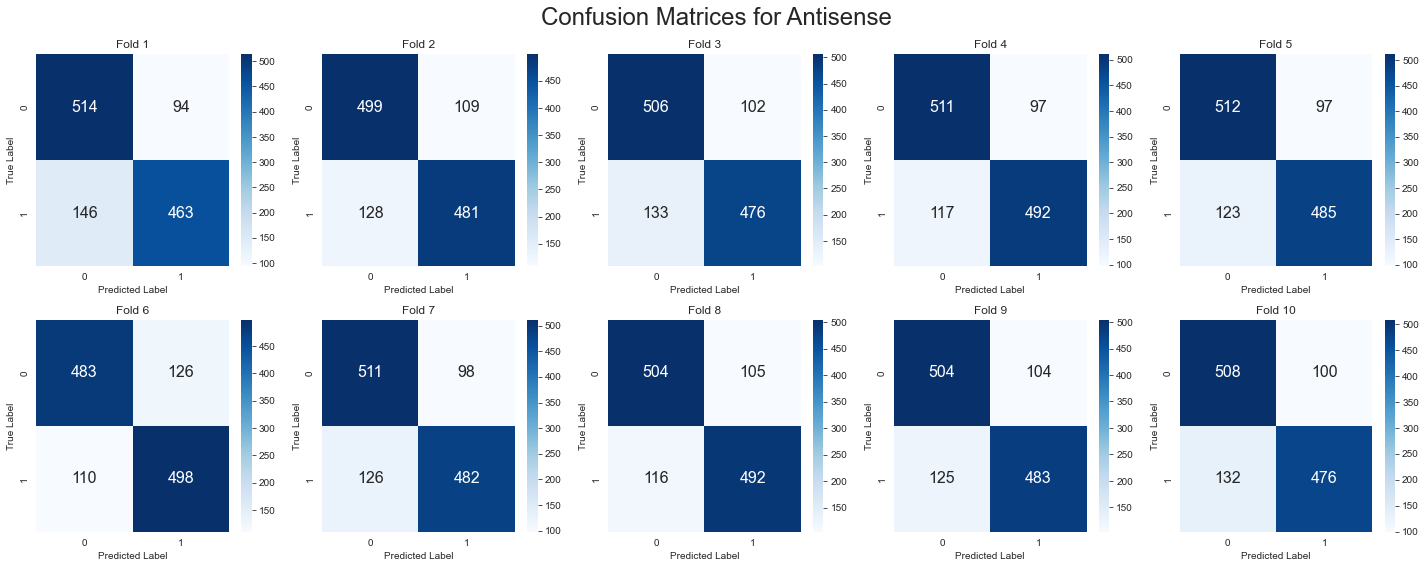

In [74]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

#### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- E.coli
- Helicobactor pylori
- Klebsiella pneumoniae
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Streptomyces coelicolor

In [75]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced sponer promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-11.5,-11.4,-13.1,-11.8,-11.2,-11.8,-13.1,-9.5,-9.5,-11.4,...,-12.0,-11.5,-11.4,-12.0,-12.0,-12.0,-10.6,-11.4,-12.3,1
1,-10.6,-11.4,-12.3,-12.0,-12.0,-10.6,-12.0,-12.0,-11.2,-11.8,...,-12.3,-11.5,-13.2,-11.5,-12.0,-11.2,-10.6,-12.3,-13.2,1
2,-9.5,-9.5,-13.2,-9.5,-12.3,-10.6,-12.3,-13.2,-12.3,-11.5,...,-11.5,-13.2,-12.3,-12.0,-10.6,-12.0,-12.3,-13.2,-11.5,1
3,-11.8,-12.3,-12.0,-11.8,-11.5,-12.3,-11.4,-10.6,-12.0,-11.2,...,-12.0,-12.0,-11.8,-13.1,-11.4,-12.0,-12.0,-10.6,-11.4,1
4,-11.5,-11.4,-11.5,-12.0,-12.0,-11.2,-12.0,-12.0,-10.6,-11.4,...,-11.8,-12.3,-12.0,-11.5,-11.4,-12.0,-12.0,-12.0,-10.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-9.5,-13.2,-9.5,-9.5,-12.3,-11.8,-13.1,-9.5,-13.2,-13.1,...,-12.3,-12.0,-11.8,-11.5,-11.4,-9.5,-9.5,-13.1,-9.5,0
12126,-9.5,-13.1,-11.4,-11.8,-13.1,-13.2,-12.3,-12.0,-11.5,-13.2,...,-9.5,-13.2,-13.1,-11.4,-12.0,-11.8,-9.5,-13.1,-13.2,0
12127,-12.0,-11.5,-11.4,-12.0,-11.5,-11.4,-11.8,-9.5,-13.1,-11.4,...,-12.3,-11.8,-13.1,-13.2,-9.5,-12.3,-11.8,-9.5,-12.3,0
12128,-13.2,-9.5,-13.1,-11.4,-12.0,-11.5,-11.4,-11.8,-9.5,-12.3,...,-13.2,-13.1,-9.5,-11.4,-10.6,-11.4,-13.1,-9.5,-13.2,0


In [76]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [77]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.8087386644682605, Precision: 0.8354203935599285, Recall: 0.7693574958813838, F1 Score: 0.8010291595197256, MCC: 0.6194447843368796, Specificity: 0.8355263157894737
Fold 2/10
 Accuracy: 0.8037922506183017, Precision: 0.8448598130841122, Recall: 0.7446457990115322, F1 Score: 0.7915936952714536, MCC: 0.6119491916448729, Specificity: 0.8481848184818482
Fold 3/10
 Accuracy: 0.8037922506183017, Precision: 0.827708703374778, Recall: 0.7677100494233937, F1 Score: 0.7965811965811965, MCC: 0.6092128095789908, Specificity: 0.863036303630363
Fold 4/10
 Accuracy: 0.8186314921681781, Precision: 0.8412698412698413, Recall: 0.785831960461285, F1 Score: 0.8126064735945485, MCC: 0.6386728380931059, Specificity: 0.8399339933993399
Fold 5/10
 Accuracy: 0.7881286067600989, Precision: 0.8070175438596491, Recall: 0.7578253706754531, F1 Score: 0.7816482582837723, MCC: 0.5773535000316266, Specificity: 0.8514851485148515
Fold 6/10
 Accuracy: 0.8136850783182193, Precision: 0.83333333333333

In [78]:
internal_accuracy

[0.8087386644682605,
 0.8037922506183017,
 0.8037922506183017,
 0.8186314921681781,
 0.7881286067600989,
 0.8136850783182193,
 0.8276999175597691,
 0.8046166529266282,
 0.8145094806265457,
 0.8211046990931574]

In [79]:
internal_precision

[0.8354203935599285,
 0.8448598130841122,
 0.827708703374778,
 0.8412698412698413,
 0.8070175438596491,
 0.8333333333333334,
 0.8488576449912126,
 0.8372943327239488,
 0.8495412844036697,
 0.8595194085027726]

In [80]:
internal_recall

[0.7693574958813838,
 0.7446457990115322,
 0.7677100494233937,
 0.785831960461285,
 0.7578253706754531,
 0.7838283828382838,
 0.7970297029702971,
 0.7557755775577558,
 0.764026402640264,
 0.7673267326732673]

In [82]:
internal_specificity

[0.8355263157894737,
 0.8481848184818482,
 0.863036303630363,
 0.8399339933993399,
 0.8514851485148515,
 0.8184818481848185,
 0.8434925864909391,
 0.8583196046128501,
 0.8533772652388797,
 0.8649093904448105]

In [81]:
internal_f1_score

[0.8010291595197256,
 0.7915936952714536,
 0.7965811965811965,
 0.8126064735945485,
 0.7816482582837723,
 0.8078231292517006,
 0.8221276595744682,
 0.7944492627927148,
 0.8045178105994787,
 0.8108108108108107]

In [83]:
internal_mcc

[0.6194447843368796,
 0.6119491916448729,
 0.6092128095789908,
 0.6386728380931059,
 0.5773535000316266,
 0.6284598655587432,
 0.6566053781578892,
 0.6121053215232269,
 0.6321941701357338,
 0.6458982797966311]

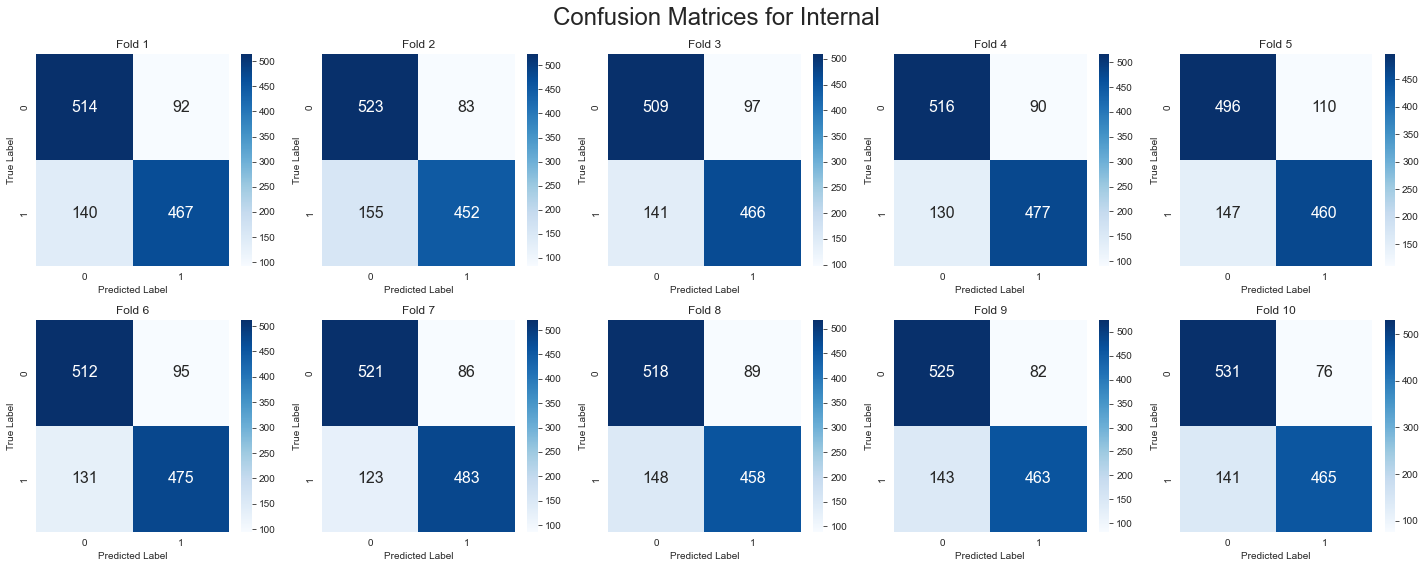

In [84]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
